In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter


In [69]:
data = pd.read_csv("C:/Users/olowe_m/OneDrive/DA Material/DS Exercise 3/MPS_cleanv1.csv")
data.head(10)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.drop(columns=['Location', 'A'], axis = 1, inplace = True)
#data.rename({'Location A' : 'Location'}, axis=1, inplace=True)
data.head(10)

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
0,0.55,9.50,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0,0
1,0.32,12.70,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,0,1
2,0.57,9.70,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0,0
3,0.50,9.50,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,0
4,0.44,10.80,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,0,1
5,0.41,10.60,0.99300,76.0,7.0,2.10,0.220,3.20,0.33,0.052,15.0,0,1
6,0.76,10.00,0.99660,110.0,7.7,7.70,0.390,3.33,0.49,0.036,11.0,0,1
7,0.50,9.55,0.99494,170.0,6.6,8.10,0.340,3.15,0.40,0.046,68.0,0,1
8,0.30,11.90,0.99200,138.0,7.3,6.85,0.330,3.03,0.40,0.038,32.0,1,1
9,0.50,9.80,0.99345,109.0,6.4,1.50,0.160,3.38,0.37,0.037,27.0,0,1


In [4]:
#Model Building

# Defining regressand(Y) and regressors(X)

from sklearn.model_selection import train_test_split
X = data.drop('Target', axis=1)
y = data['Target']

X.head()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,1


In [5]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
data.describe()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.531150,10.492825,0.994698,115.694492,7.217755,5.443958,0.339589,3.218332,0.318758,0.056056,30.516865,0.196658,0.753520
std,0.148913,1.193128,0.003001,56.526736,1.297913,4.756852,0.164639,0.160650,0.145252,0.035076,17.758815,0.397502,0.430995
min,0.220000,8.000000,0.987110,6.000000,3.800000,0.600000,0.080000,2.720000,0.000000,0.009000,1.000000,0.000000,0.000000
25%,0.430000,9.500000,0.992330,77.000000,6.400000,1.800000,0.230000,3.110000,0.250000,0.038000,17.000000,0.000000,1.000000
50%,0.510000,10.300000,0.994890,118.000000,7.000000,3.000000,0.290000,3.210000,0.310000,0.047000,29.000000,0.000000,1.000000
75%,0.600000,11.300000,0.997000,156.000000,7.700000,8.100000,0.400000,3.320000,0.390000,0.065000,41.000000,0.000000,1.000000
max,2.000000,14.900000,1.038980,440.000000,15.900000,65.800000,1.580000,4.010000,1.660000,0.611000,289.000000,1.000000,1.000000


In [6]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[1:12]

FlowRate                0.082111
Sensor2                 0.041143
Sensor5.1               0.038788
MaxOutputRate           0.036369
Sensor5                 0.022805
ComponentAge            0.016007
Sensor3                 0.011527
Sensor1                 0.009266
DaysSinceMaintenance    0.009094
Sensor4                 0.006793
Location A              0.003067
Name: MI Scores, dtype: float64

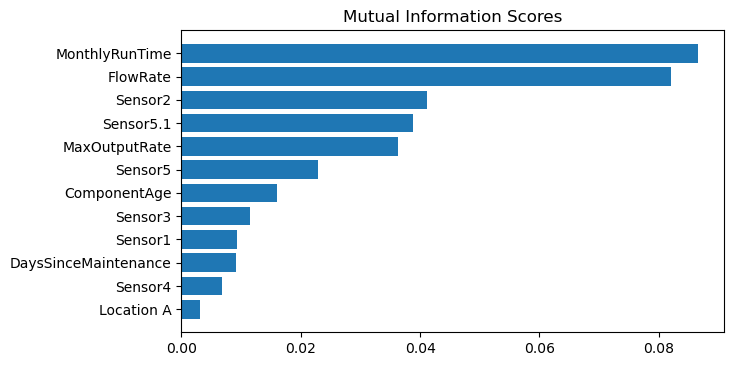

In [7]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(7, 4))
plot_mi_scores(mi_scores)

The results suggest perhaps four of the 10 features as being important to prediction.
MonthlyRunTime	
FlowRate	
MaxOutputRate	
Sensor2	
Sensor3	
Sensor5	
Sensor5.1

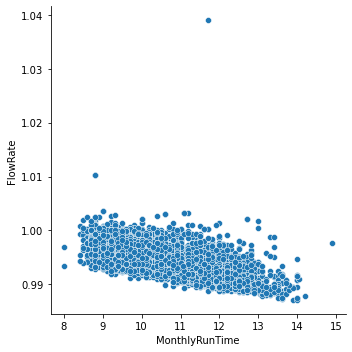

In [8]:
sns.relplot(x="MonthlyRunTime",y="FlowRate", data=data);

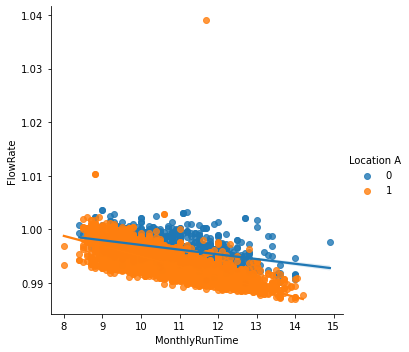

In [9]:
sns.lmplot(x="MonthlyRunTime", y="FlowRate", hue="Location A", data=data);

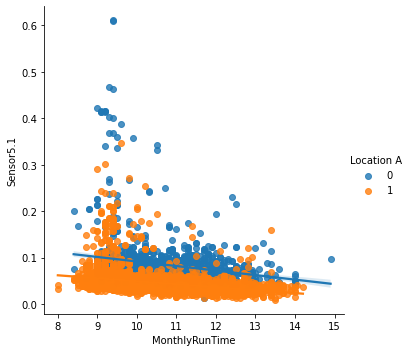

In [10]:
sns.lmplot(x="MonthlyRunTime", y="Sensor5.1", hue="Location A", data=data);

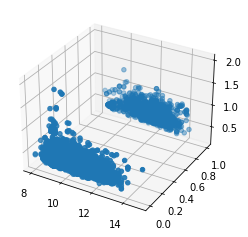

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['MonthlyRunTime'], data['Target'], data['ComponentAge'])

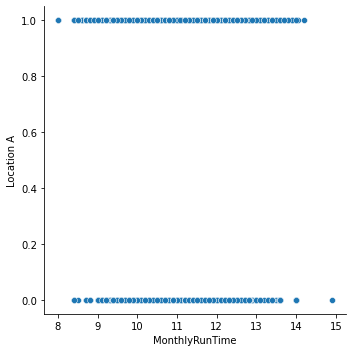

In [12]:
sns.relplot(x="MonthlyRunTime",y="Location A", data=data);

In [13]:
#Splitting the dataset for training(80%) and testing(20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 12)
(1293, 12)
(5170,)
(1293,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1037
           1       0.58      0.60      0.59       256

    accuracy                           0.84      1293
   macro avg       0.74      0.75      0.74      1293
weighted avg       0.84      0.84      0.84      1293

0.16473317865429235


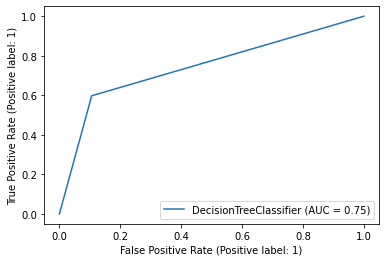

In [15]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model, X_test,y_test)

UnderSample Method

In [16]:
data['Target'].value_counts()

0    5192
1    1271
Name: Target, dtype: int64

In [17]:
#class count
count_class_0, count_class_1 = data.Target.value_counts()

#divide by class
data_class_0 = data[data['Target']==0]
data_class_1 = data[data['Target']==1]

In [18]:
data_class_0.shape

(5192, 13)

In [19]:
data_class_1.shape

(1271, 13)

In [20]:
data_class_0_under = data_class_0.sample(count_class_1)

data_concate_under = pd.concat([data_class_0_under, data_class_1], axis=0)

data_concate_under['Target'].value_counts()

data_concate_under.head()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
5084,0.57,10.0,0.99520,180.0,6.4,2.0,0.440,3.58,0.26,0.054,20.0,0,1
6008,0.76,11.3,0.99238,153.0,5.0,2.7,0.255,3.75,0.22,0.043,46.0,0,1
360,0.63,10.2,0.99940,62.0,10.0,2.2,0.590,3.18,0.31,0.090,26.0,0,0
1804,0.51,9.5,0.99592,183.0,6.3,11.2,0.280,3.12,0.47,0.040,61.0,0,1
5449,0.43,9.3,0.99610,202.0,6.7,8.0,0.270,3.22,0.25,0.053,54.0,0,1


In [21]:
data_concate_under.describe()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000
mean,0.534949,10.842709,0.994050,112.882966,7.150393,5.195909,0.318269,3.222935,0.320519,0.051723,30.790519,0.500000,0.782455
std,0.153664,1.286099,0.003097,52.690958,1.311635,4.472148,0.146780,0.160363,0.134197,0.030159,16.710380,0.500098,0.412658
min,0.220000,8.400000,0.987110,6.000000,3.800000,0.600000,0.080000,2.790000,0.000000,0.012000,1.000000,0.000000,0.000000
25%,0.430000,9.700000,0.991465,83.000000,6.400000,1.800000,0.220000,3.120000,0.260000,0.035000,18.000000,0.000000,1.000000
50%,0.510000,10.800000,0.993820,116.000000,6.900000,3.050000,0.280000,3.210000,0.310000,0.044000,29.000000,0.500000,1.000000
75%,0.610000,11.900000,0.996500,149.000000,7.600000,7.600000,0.370000,3.330000,0.390000,0.058000,41.000000,1.000000,1.000000
max,1.360000,14.200000,1.010300,303.000000,15.600000,31.600000,1.240000,3.900000,1.660000,0.415000,138.500000,1.000000,1.000000


In [22]:
X = data_concate_under.drop('Target', axis=1)
y = data_concate_under['Target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2033, 12)
(509, 12)
(2033,)
(509,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       258
           1       0.72      0.79      0.75       251

    accuracy                           0.75       509
   macro avg       0.75      0.75      0.75       509
weighted avg       0.75      0.75      0.75       509

0.25343811394891946


In [24]:
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.281912
Sensor3,0.107583
Sensor2,0.097346
MaxOutputRate,0.074591
FlowRate,0.073835
Sensor5.1,0.071399
Sensor4,0.069556
Sensor1,0.066501
Sensor5,0.059959
ComponentAge,0.051140


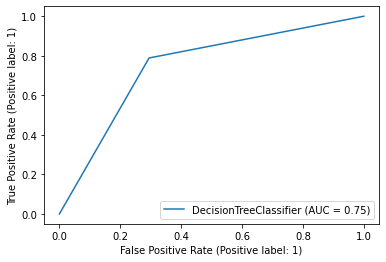

In [25]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model, X_test,y_test)

Method 2: Oversample

In [26]:
count_class_0, count_class_1

(5192, 1271)

In [27]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)

data_class_over = pd.concat([data_class_1_over, data_class_0],axis=0)

In [28]:
X = data_class_over.drop('Target', axis=1)
y = data_class_over['Target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8307, 12)
(2077, 12)
(8307,)
(2077,)


In [29]:
data_class_over.describe()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
count,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000
mean,0.534567,10.852546,0.994053,113.560767,7.160598,5.215413,0.320167,3.222261,0.324336,0.051616,30.640071,0.500000,0.784958
std,0.153401,1.286784,0.003110,52.852894,1.304258,4.527865,0.150539,0.160453,0.132650,0.030960,16.696778,0.500024,0.410872
min,0.220000,8.000000,0.987110,6.000000,3.800000,0.600000,0.080000,2.720000,0.000000,0.009000,1.000000,0.000000,0.000000
25%,0.430000,9.700000,0.991455,83.000000,6.400000,1.800000,0.220000,3.110000,0.260000,0.035000,18.000000,0.000000,1.000000
50%,0.510000,10.800000,0.993820,116.000000,6.900000,2.950000,0.280000,3.210000,0.320000,0.044000,29.000000,0.500000,1.000000
75%,0.610000,11.900000,0.996500,149.000000,7.600000,7.600000,0.380000,3.330000,0.390000,0.058000,41.000000,1.000000,1.000000
max,2.000000,14.900000,1.038980,440.000000,15.900000,65.800000,1.580000,4.010000,1.660000,0.611000,289.000000,1.000000,1.000000


In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1010
           1       0.90      0.99      0.95      1067

    accuracy                           0.94      2077
   macro avg       0.95      0.94      0.94      2077
weighted avg       0.95      0.94      0.94      2077

0.058738565238324505


In [31]:
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.286168
Sensor3,0.096381
Sensor2,0.093630
MaxOutputRate,0.081679
Sensor4,0.071168
Sensor5,0.066839
FlowRate,0.063828
DaysSinceMaintenance,0.063125
ComponentAge,0.060915
Sensor1,0.058370


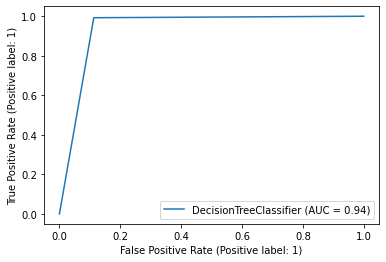

In [32]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model, X_test,y_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(X_train,y_train)
base_preds = model_rf.predict(X_test)

# get predicted prices on validation data using training data
print("Random Forest score : ", model_rf.score(X_test, y_test))
print("Mean Square Error: ", mean_absolute_error(y_test, base_preds))

Random Forest score :  0.9619643716899374
Mean Square Error:  0.03803562831006259


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1010
           1       0.94      0.98      0.96      1067

    accuracy                           0.96      2077
   macro avg       0.96      0.96      0.96      2077
weighted avg       0.96      0.96      0.96      2077



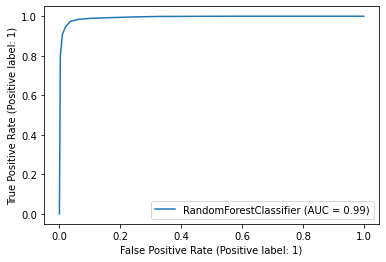

In [53]:
print(classification_report(y_test,base_preds))

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model_rf, X_test,y_test)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
base_preds = model_lr.predict(X_test)

# get predicted prices on validation data using training data
print("Logistic Regression score : ", model_lr.score(X_test, y_test))
print("Mean Square Error: ", mean_absolute_error(y_test, base_preds))

Logistic Regression score :  0.7188252286952335
Mean Square Error:  0.2811747713047665


C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1010
           1       0.72      0.75      0.73      1067

    accuracy                           0.72      2077
   macro avg       0.72      0.72      0.72      2077
weighted avg       0.72      0.72      0.72      2077



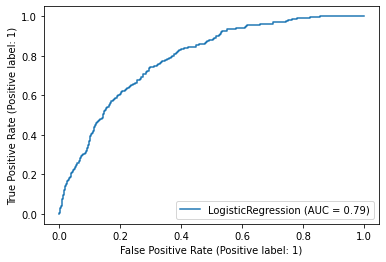

In [55]:
print(classification_report(y_test,base_preds))

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model_lr, X_test,y_test)

In [56]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import mean_absolute_error, accuracy_score

model_nb = MultinomialNB()
model_nb.fit(X_train,y_train)
base_preds = model_nb.predict(X_test)

# get predicted prices on validation data using training data
print("Naive Bayes score : ", model_nb.score(X_test, y_test))
print("Mean Square Error: ", mean_absolute_error(y_test, base_preds))

Naive Bayes score :  0.6104959075589793
Mean Square Error:  0.3895040924410207


              precision    recall  f1-score   support

           0       0.60      0.57      0.59      1010
           1       0.62      0.64      0.63      1067

    accuracy                           0.61      2077
   macro avg       0.61      0.61      0.61      2077
weighted avg       0.61      0.61      0.61      2077



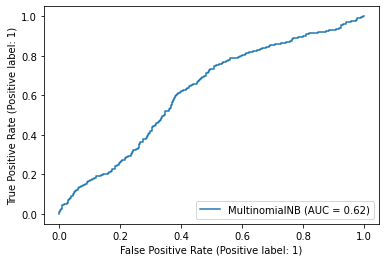

In [57]:
print(classification_report(y_test,base_preds))

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model_nb, X_test,y_test)

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("Mean Square Error: ", mean_absolute_error(y_test, y_pred))

0.7390467019740009
Mean Square Error:  0.26095329802599904


              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1010
           1       0.73      0.79      0.76      1067

    accuracy                           0.74      2077
   macro avg       0.74      0.74      0.74      2077
weighted avg       0.74      0.74      0.74      2077



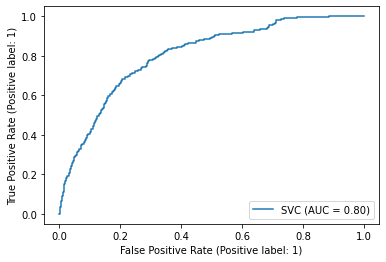

In [59]:
print(classification_report(y_test,y_pred))

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(clf, X_test,y_test)

In [63]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[1:12]

MonthlyRunTime          0.148316
Sensor2                 0.085724
MaxOutputRate           0.084883
Sensor5.1               0.079850
Sensor3                 0.047329
Sensor5                 0.043021
DaysSinceMaintenance    0.040555
Sensor1                 0.029772
ComponentAge            0.022371
Sensor4                 0.016706
Location A              0.005312
Name: MI Scores, dtype: float64

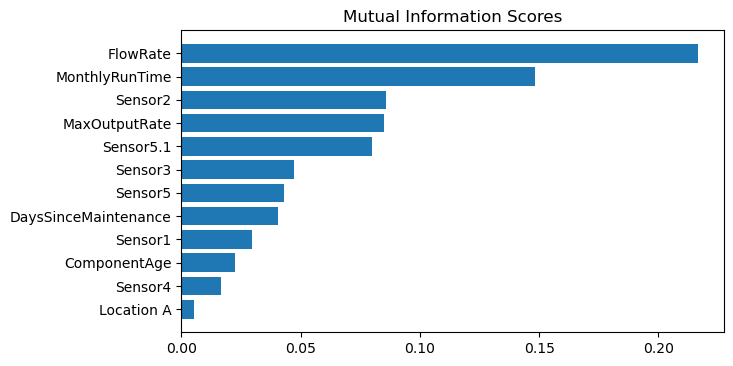

In [64]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(7, 4))
plot_mi_scores(mi_scores)

method3: SMOTE

In [32]:
X = data.drop('Target', axis=1)
y = data['Target']

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8307, 12)
(2077, 12)
(8307,)
(2077,)


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1046
           1       0.86      0.85      0.86      1031

    accuracy                           0.86      2077
   macro avg       0.86      0.86      0.86      2077
weighted avg       0.86      0.86      0.86      2077

0.14347616754935003


In [36]:
#Calculate Feature Importance
pd.DataFrame(index=X_sm.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.312132
Sensor3,0.121033
Sensor2,0.077593
Sensor1,0.071319
ComponentAge,0.069299
DaysSinceMaintenance,0.067593
MaxOutputRate,0.065415
Sensor4,0.062777
Sensor5.1,0.053360
FlowRate,0.050687


C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


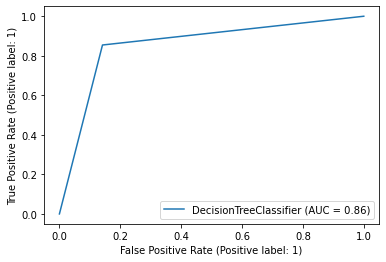

In [37]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model, X_test,y_test)